# <center>Case 4: VAI Telecom</center>
___

Este notebook contém os primeiros passos para a análise do case e deverá ser utilizado para o nosso próximo encontro de sábado 12/06.

A conclusão desse pré-work não é obrigatória, porém recomendamos que seja feita para facilitar a dinâmica no dia do encontro.

### Instruções do Pré-Work
Explore os dados recebidos de forma a gerar gráficos e tabelas que ajudem a entender as principais relações entre as variáveis bem como quais informações podem ser importantes para a classificação de clientes propensos ao churn.

Foque em gerar os principais insights e construir novas *features* que possam ajudar na classificação de clientes.

# 0 - Configurações

In [1]:
# biblioteca para visualização interativa de dados
!pip install -q plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Alguns exemplos deste notebook utilizam a visualização de mapas do Plotly. Para que seja possível criá-las é necessário ter um token do MapBox. Já deixamos configurado um token pra você, mas caso queira criar o seu próprio token basta [clicar aqui](https://docs.mapbox.com/help/getting-started/access-tokens/) e seguir o tutorial.

In [3]:
# Mapas
import plotly.graph_objects as go
import plotly.express as px
mapbox_access_token = 'pk.eyJ1IjoiZmVsaXBlc2FtcGFpbyIsImEiOiJja2F6d20xa2QwMjk1MnJwZmR4dmZ3amtlIn0.7yT3W9cEXxCCOP183JF5xQ'
px.set_mapbox_access_token(mapbox_access_token)

# 1 - Carregamento das Bases

In [4]:
# Customers: contém informações qualitativas referentes aos clientes da VAI Telecom
df_customers = pd.read_csv("Datasets/customers.csv", sep=';', decimal=',', index_col='customerID')
df_customers.head()

,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason
customerID,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN
0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN
0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high
0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction
0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability


In [5]:
# Charge Records: contém informações sobre os pagamentos efetuados pelos clientes
df_charge = pd.read_csv("Datasets/charge_records.csv", sep=';', decimal=',')
df_charge.head()

,ActiveMonth,customerID,Charges
0,M-0,0002-ORFBO,65.7450
1,M-0,8399-YNDCH,59.8010
2,M-0,2197-OMWGI,53.5225
3,M-0,8398-TBIYD,85.5675
4,M-0,2200-DSAAL,80.6500


# 2 - Análise Exploratória

## 2.1 - Análise Geográfica

Essa seção contém 2 exemplos de utilização do plotly para criação de visualização de mapas caso ache interessante de aplicar. Como nossa base possui informações geográfica, é possível explorá-la para obter algum insight.

Dêem uma olhada na [documentação do plotly](https://plotly.com/python/)

In [6]:
# Precisamos tratar a coluna 'LatLong' para que esteja adequada para utlização
df_customers[['Lat', 'Long']] = df_customers['LatLong'].str.split(',', expand=True)
df_customers['Lat'] = df_customers['Lat'].astype(float)
df_customers['Long'] = df_customers['Long'].astype(float)

In [7]:
# Utilizando o plotly podemos de forma simples construir gráficos interativos, um deles é o scatter map
fig = px.scatter_mapbox(df_customers, 
                        lat="Lat", lon="Long", color='Churn',
                        zoom=5)
fig.show()

In [8]:
# Outro tipo de gráfico é o densidade
fig = px.density_mapbox(df_customers, 
                        lat="Lat", lon="Long", radius=10,
                        center=dict(lat=36, lon=-119), zoom=4)
fig.show()

## 2.2 - Agora é a Sua Vez

Explora a base da forma que preferir. Apliquem as técnicas de **Feature Engineering** para criar novas colunas que auxiliem na análise.

Bom trabalho!!

### 2.2.1. Charge Records

Vamos primeiro analisar essa primeira tabela e seus valores. Temos três colunas:
<li> <b>ActiveMonth</b>: Mês de referência em relação a permanência do cliente na empresa </li>
<li> <b>customerID</b>: ID do cliente </li>
<li> <b>Charges</b>: Pagamento por serviços </li>
Com 227990 instâncias.

In [9]:
print(df_charge.shape)
df_charge.head()

(227990, 3)


,ActiveMonth,customerID,Charges
0,M-0,0002-ORFBO,65.7450
1,M-0,8399-YNDCH,59.8010
2,M-0,2197-OMWGI,53.5225
3,M-0,8398-TBIYD,85.5675
4,M-0,2200-DSAAL,80.6500


In [10]:
df_charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227990 entries, 0 to 227989
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ActiveMonth  227990 non-null  object 
 1   customerID   227990 non-null  object 
 2   Charges      227990 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.2+ MB


#### ActiveMonth

Para a primeira coluna ActiveMonth, vemos a distribuição de valores. 

Temos 72 valores referentes a essa coluna: de M-0 a M-71.

In [11]:
print(df_charge['ActiveMonth'].unique())
print(len(df_charge['ActiveMonth'].unique()))

['M-0' 'M-1' 'M-10' 'M-11' 'M-12' 'M-13' 'M-14' 'M-15' 'M-16' 'M-17'
 'M-18' 'M-19' 'M-2' 'M-20' 'M-21' 'M-22' 'M-23' 'M-24' 'M-25' 'M-26'
 'M-27' 'M-28' 'M-29' 'M-3' 'M-30' 'M-31' 'M-32' 'M-33' 'M-34' 'M-35'
 'M-36' 'M-37' 'M-38' 'M-39' 'M-4' 'M-40' 'M-41' 'M-42' 'M-43' 'M-44'
 'M-45' 'M-46' 'M-47' 'M-48' 'M-49' 'M-5' 'M-50' 'M-51' 'M-52' 'M-53'
 'M-54' 'M-55' 'M-56' 'M-57' 'M-58' 'M-59' 'M-6' 'M-60' 'M-61' 'M-62'
 'M-63' 'M-64' 'M-65' 'M-66' 'M-67' 'M-68' 'M-69' 'M-7' 'M-70' 'M-71'
 'M-8' 'M-9']
72


Vamos que a referência M-0 é a que apresenta um maior número de compras, seguindo em ordem por M-1, M-2 etc, até M-71 que é o último mês de referência presente nos dados.

In [12]:
pd.crosstab(index=df_charge['ActiveMonth'], columns='count', margins=True).sort_values(ascending=False, by='count')

col_0,count,All
ActiveMonth,,
All,227990,227990
M-0,7032,7032
M-1,6419,6419
M-2,6181,6181
M-3,5981,5981
...,...,...
M-67,846,846
M-68,746,746
M-69,651,651


#### Charges

Vamos ver em relação a coluna Charges, a sua distribuição de valores e relação com a coluna ActiveMonth.

In [13]:
df_charge.describe()

,Charges
count,227990.000000
mean,70.424881
std,31.334567
min,0.004000
25%,45.142000
50%,78.150500
75%,96.832000
max,163.486500


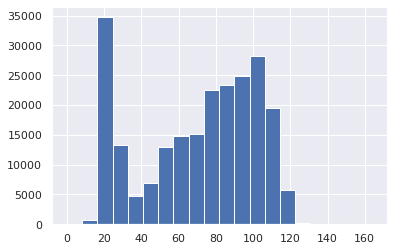

In [14]:
df_charge['Charges'].hist(bins=20)

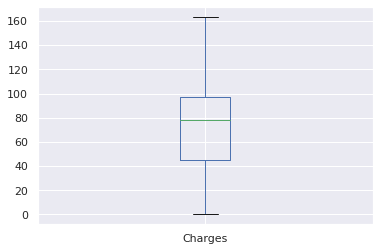

In [15]:
df_charge['Charges'].plot(kind='box')

Vamos ver a distribuição de Charges com ActiveMonth, vemos que o valor total de Charges por mês segue a mesma lógica do número de charges por mês, valores maiores de M-0 até M-71.

In [16]:
df_charge.groupby('ActiveMonth')['Charges'].sum().sort_values(ascending=False)

ActiveMonth
M-0     455634.4810
M-1     424478.7245
M-2     411347.0390
M-3     399621.1880
M-4     389247.2200
           ...     
M-67     64941.6910
M-68     57553.4430
M-69     50888.0145
M-70     41778.2685
M-71     29217.3360
Name: Charges, Length: 72, dtype: float64

Graficamente, temos:

Text(0.5, 1.0, 'Número total de Charges para cada ActiveMonth')

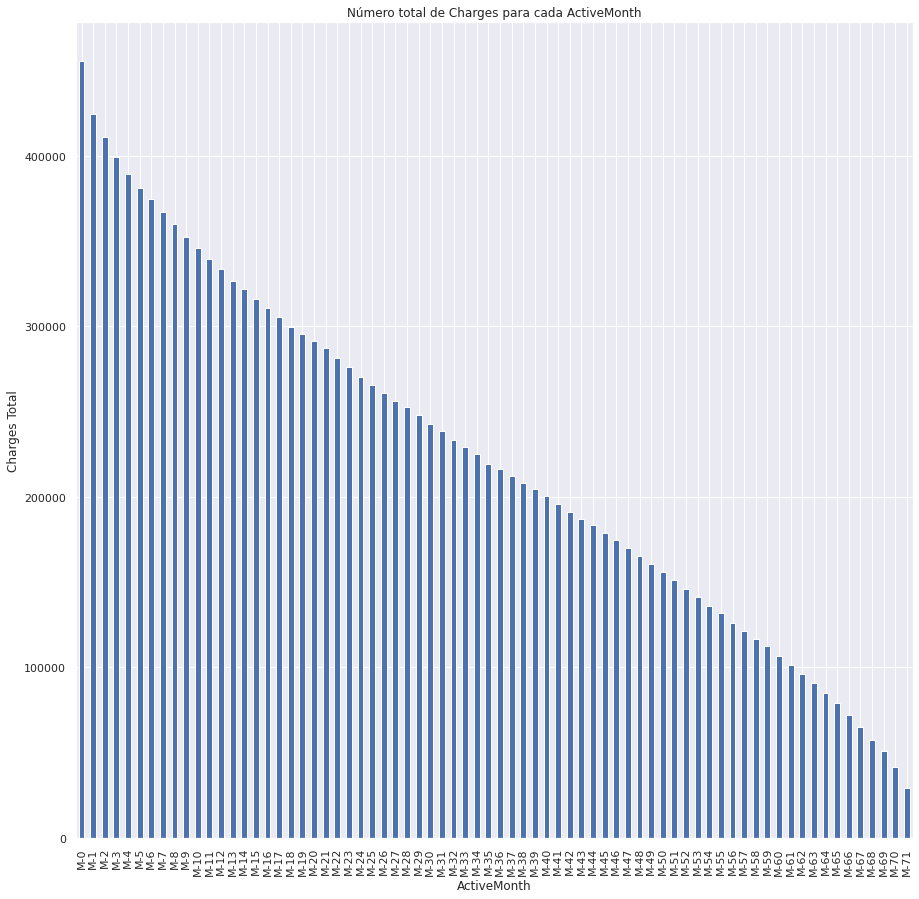

In [17]:
df_charge.groupby('ActiveMonth')['Charges'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,15))
plt.ylabel("Charges Total")
plt.title("Número total de Charges para cada ActiveMonth")

#### CustomerID

Agora, antes de abordar o dataset de clientes, vamos ver a distribuição do ID dos clientes no dataset de Charges.

In [18]:
pd.crosstab(index=df_charge['customerID'], columns='count', margins=True).sort_values(ascending=False, by='count')

col_0,count,All
customerID,,
All,227990,227990
5781-BKHOP,72,72
5803-NQJZO,72,72
0769-MURVM,72,72
5879-HMFFH,72,72
...,...,...
4361-JEIVL,1,1
4351-QLCSU,1,1
4349-GFQHK,1,1


Vemos que temos 7032 clientes e que o valor máximo de compras registrado para um cliente foi de 72, que é justamente o número de mês ativos, ou seja, esses clientes, possivelmente, fizeram uma compra por mês.

Comparando a coluna customerID com ActiveMonth, vemos que a hipótese anterior estava certa, o número de vezes que o cliente aparece em Charges diz respeito aos meses das compras, não aparecendo mais de uma vez por mês.

In [19]:
df_charge.groupby('customerID')['ActiveMonth'].size().sort_values(ascending=False)

customerID
5727-MYATE    72
8309-PPCED    72
3511-BFTJW    72
9637-CDTKZ    72
0392-BZIUW    72
              ..
7239-HZZCX     1
2868-MZAGQ     1
2876-VBBBL     1
7216-EWTRS     1
5103-MHMHY     1
Name: ActiveMonth, Length: 7032, dtype: int64

Agora para customerID e a coluna Charges.

Aqui temos o valor total de Charge para cada cliente.

In [20]:
df_charge.groupby('customerID')['Charges'].sum()

customerID
0002-ORFBO     593.30
0003-MKNFE     542.40
0004-TLHLJ     280.85
0011-IGKFF    1237.85
0013-EXCHZ     267.40
               ...   
9987-LUTYD     742.90
9992-RRAMN    1873.70
9992-UJOEL      92.75
9993-LHIEB    4627.65
9995-HOTOH    3707.60
Name: Charges, Length: 7032, dtype: float64

Text(0.5, 1.0, 'Distribuição do valor total de Charges por CLiente')

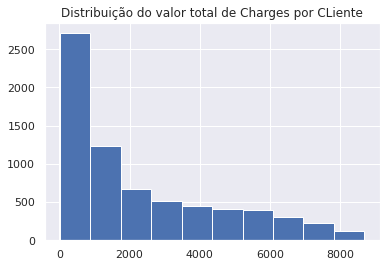

In [21]:
df_charge.groupby('customerID')['Charges'].sum().hist()
plt.title("Distribuição do valor total de Charges por CLiente")

Vamos ver o valor médio e sua distribuição.

In [22]:
df_charge.groupby('customerID')['Charges'].mean()

customerID
0002-ORFBO    65.922222
0003-MKNFE    60.266667
0004-TLHLJ    70.212500
0011-IGKFF    95.219231
0013-EXCHZ    89.133333
                ...    
9987-LUTYD    57.146154
9992-RRAMN    85.168182
9992-UJOEL    46.375000
9993-LHIEB    69.069403
9995-HOTOH    58.850794
Name: Charges, Length: 7032, dtype: float64

Text(0.5, 1.0, 'Distribuição da média do valor de Charges por Cliente')

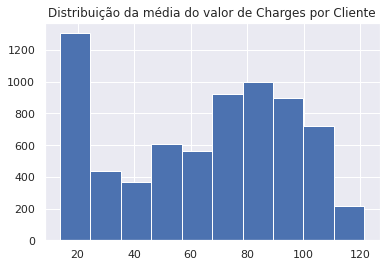

In [23]:
df_charge.groupby('customerID')['Charges'].mean().hist()
plt.title("Distribuição da média do valor de Charges por Cliente")

### 2.2.1. Customers

Vamos analisar agora o dataset de Clientes.

In [24]:
print(df_customers.shape)
df_customers.head()

(7043, 25)


,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903


In [25]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Country           7043 non-null   object 
 2   State             7043 non-null   object 
 3   City              7043 non-null   object 
 4   ZipCode           7043 non-null   int64  
 5   LatLong           7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

A primeira coisa que nota-se é que haviamos encontrado 7032 clientes diferentes no dataset de Charges e aqui temos 7043 clientes. Valor analisar os valores presentes em cada coluna.

In [26]:
df_customers['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [27]:
df_customers['Country'].value_counts()

United States    7043
Name: Country, dtype: int64

In [28]:
df_customers['State'].value_counts()

California    7043
Name: State, dtype: int64

In [29]:
df_customers['City'].value_counts()

Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Oregon House       4
Burson             4
Brooks             4
Georgetown         4
Brownsville        4
Name: City, Length: 1129, dtype: int64

In [30]:
df_customers['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [31]:
df_customers['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Temos muitas colunas que apenas tem YES ou NO que não serão exploradas agora, vamos ver as que tem valores diferentes.

In [32]:
df_customers['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [33]:
df_customers['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [34]:
df_customers['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [35]:
df_customers['ChurnReason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Lack of affordable download/upload speed      44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: ChurnReason, d

Vemos que colunas como Country e State são inúteis pois apresentam apenas um valor que é United States e Colifornia respectivamente, assim, podem ser tiradas do dataset. Além disso todas as colunas que apresentam apenas dois valores, sendo eles Male/Female ou YES/NO, podem ser substituídas por uma coluna com valores 0 e 1.

Para as colunas como: InternetService, Contract, PaymentMethod e ChurnReason, que apresentam mais variação de valores, serão criadas mais colunas em seu lugar, mas ainda com variação de 0 e 1.

Tudo isso será feito no Feature Engineering.

# 3 - Feature Engineering

## 3.1 Dropping

Primeiramente valor retirar as colunas de Country e State que não fazem nada para o dataset.

Vamos retirar LatLong também pois suas informações já estão em outras colunas.

In [36]:
df_customers2 = df_customers.drop(['Country','State','LatLong'], axis=1)

In [37]:
df_customers2.head()

,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,Frazier Park,93225,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,Male,Glendale,91206,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,Male,Costa Mesa,92627,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,Male,Martinez,94553,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,Female,Camarillo,93010,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903


## 3.2 Factorize

como abordagem geral será considerado Yes = 1 e No = 0, mas será analisado caso a caso.

Para Gender será considerado Female = 0 e Male =1.

In [38]:
label, val = pd.factorize(df_customers2['gender'], sort=True)
print(val)
df_customers2['gender'] = label
df_customers2.head()

Index(['Female', 'Male'], dtype='object')


,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,1,Glendale,91206,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,1,Costa Mesa,92627,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,1,Martinez,94553,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,0,Camarillo,93010,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903


Para a coluna Partner teremos Yes=1 e No=0.

In [39]:
label, val = pd.factorize(df_customers2['Partner'], sort=True)
print(val)
df_customers2['Partner'] = label
df_customers2.head()

Index(['No', 'Yes'], dtype='object')


,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,1,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,1,Glendale,91206,0,0,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,1,Costa Mesa,92627,0,0,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,1,Martinez,94553,1,1,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,0,Camarillo,93010,1,1,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903


Para dependents Yes=1 e No=0.

In [40]:
label, val = pd.factorize(df_customers2['Dependents'], sort=True)
print(val)
df_customers2['Dependents'] = label
df_customers2.head()

Index(['No', 'Yes'], dtype='object')


,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,1,1,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,1,Glendale,91206,0,0,0,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,1,Costa Mesa,92627,0,0,0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,1,Martinez,94553,1,1,0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,0,Camarillo,93010,1,1,0,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903


Para PhoneService.

In [41]:
label, val = pd.factorize(df_customers2['PhoneService'], sort=True)
print(val)
df_customers2['PhoneService'] = label
df_customers2.head()

Index(['No', 'Yes'], dtype='object')


,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,1,1,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,1,Glendale,91206,0,0,0,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,1,Costa Mesa,92627,0,0,0,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,1,Martinez,94553,1,1,0,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,0,Camarillo,93010,1,1,0,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903


Para as colunas MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies temos os valores: Yes, No e No Internet service, assim esses casos serão tratados no OneHotEncoding.

Para PaperlessBiling

In [42]:
label, val = pd.factorize(df_customers2['PaperlessBilling'], sort=True)
print(val)
df_customers2['PaperlessBilling'] = label
df_customers2.head()

Index(['No', 'Yes'], dtype='object')


,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,1,1,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,1,Glendale,91206,0,0,0,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,1,Costa Mesa,92627,0,0,0,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,1,Martinez,94553,1,1,0,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,0,Camarillo,93010,1,1,0,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,Yes,Network reliability,34.227846,-119.079903


Para Churn


In [43]:
label, val = pd.factorize(df_customers2['Churn'], sort=True)
print(val)
df_customers2['Churn'] = label
df_customers2.head()

Index(['No', 'Yes'], dtype='object')


,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,1,1,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,0,NaN,34.827662,-118.999073
0003-MKNFE,1,Glendale,91206,0,0,0,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,0,NaN,34.162515,-118.203869
0004-TLHLJ,1,Costa Mesa,92627,0,0,0,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,1,Price too high,33.645672,-117.922613
0011-IGKFF,1,Martinez,94553,1,1,0,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,1,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,0,Camarillo,93010,1,1,0,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,1,Network reliability,34.227846,-119.079903


Até aqui todas as colunas que apresentavam apenas dois valores foram substituídas por apenas 1/0.

## 3.3 Casos Especiais

No caso de MultipleLines temos Yes, no e No Phone Service, porém já temos uma coluna que diz se o cliente tem ou não servico de telephone, ou seja, a informação está aparecendo duas vezes.

In [44]:
print('Número de clientes sem serviço de telefone: ')
print((df_customers2['PhoneService'] == 0).sum())
print()
print("Coluna MultipleLines:")
df_customers2['MultipleLines'].value_counts()

Número de clientes sem serviço de telefone: 
682

Coluna MultipleLines:


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Para facilitar, aqui será considerado que para todos os "No phone service" teremos MultipleLines = No, pois essa informação já vai ser dada pela coluna PhoneService.

In [45]:
df_customers2['MultipleLines'] = df_customers2['MultipleLines'].map({'No phone service':'No', 'Yes':'Yes', 'No':'No'})
df_customers2['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

Aqui trataremos das colunas OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies que apresentam três valores: Yes, No e No Internet Service.

Podemos tratar esses clientes que não tem serviço de internet de maneira separada.

In [46]:
colunas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_customers2[colunas]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,
0002-ORFBO,No,Yes,No,Yes,Yes,No
0003-MKNFE,No,No,No,No,No,Yes
0004-TLHLJ,No,No,Yes,No,No,No
0011-IGKFF,No,Yes,Yes,No,Yes,Yes
0013-EXCHZ,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...
9987-LUTYD,Yes,No,No,Yes,No,No
9992-RRAMN,No,No,No,No,No,Yes
9992-UJOEL,No,Yes,No,No,No,No


Vamos obsevar a coluna InternetService

In [47]:
df_customers2['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Vemos que ela fornece dois tipos de informação, para as pessoas que tem internet ela dá os dois tipos de internet que a pessoa pode ter e além disso ela também descreve as pessoas que tem e não tem serviço de internet, seria bom separar essas duas informações criando uma colunas apenas para quem tem ou não internet e outras duas para cada tipo.

In [48]:
pd.get_dummies(df_customers2['InternetService'], prefix='InternetService_').head()

,InternetService__DSL,InternetService__Fiber optic,InternetService__No
customerID,,,
0002-ORFBO,1,0,0
0003-MKNFE,1,0,0
0004-TLHLJ,0,1,0
0011-IGKFF,0,1,0
0013-EXCHZ,0,1,0


Aqui iremos retirar a coluna InternetService e colocar ao final três colunas, uma se tem DSL, ou se tem fibra ótica e uma terceira que terá valor 1 quando o cliente não tiver serviço de internet.

In [49]:
df_customers2 = pd.concat([df_customers2.drop("InternetService", axis=1), pd.get_dummies(df_customers2['InternetService'], prefix='InternetService_')], axis=1)
df_customers2.head()

,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long,InternetService__DSL,InternetService__Fiber optic,InternetService__No
customerID,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,1,1,1,No,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,0,NaN,34.827662,-118.999073,1,0,0
0003-MKNFE,1,Glendale,91206,0,0,0,1,Yes,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,0,NaN,34.162515,-118.203869,1,0,0
0004-TLHLJ,1,Costa Mesa,92627,0,0,0,1,No,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,1,Price too high,33.645672,-117.922613,0,1,0
0011-IGKFF,1,Martinez,94553,1,1,0,1,No,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,1,Product dissatisfaction,38.014457,-122.115432,0,1,0
0013-EXCHZ,0,Camarillo,93010,1,1,0,1,No,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,1,Network reliability,34.227846,-119.079903,0,1,0


Vamos fatorizar agora essa coluna MultipleLines

In [50]:
label, val = pd.factorize(df_customers2['MultipleLines'], sort=True)
print(val)
df_customers2['MultipleLines'] = label

Index(['No', 'Yes'], dtype='object')


Agora podemos tratar das colunas OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies.

In [51]:
colunas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_customers2[colunas]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,
0002-ORFBO,No,Yes,No,Yes,Yes,No
0003-MKNFE,No,No,No,No,No,Yes
0004-TLHLJ,No,No,Yes,No,No,No
0011-IGKFF,No,Yes,Yes,No,Yes,Yes
0013-EXCHZ,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...
9987-LUTYD,Yes,No,No,Yes,No,No
9992-RRAMN,No,No,No,No,No,Yes
9992-UJOEL,No,Yes,No,No,No,No


Como a informação de ter ou não serviço de internet já está em outra colunas, vamos considerar No para todos os valores que tiverem "No internet service".

In [52]:
for coluna in colunas:
  df_customers2[coluna] = df_customers2[coluna].map({'No Internet service':'No', 'Yes':'Yes', 'No':'No'})
  print(df_customers2[coluna].value_counts())

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64
No     3473
Yes    2044
Name: TechSupport, dtype: int64
No     2810
Yes    2707
Name: StreamingTV, dtype: int64
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64


Agora será feito o factorize para essas colunas:

In [53]:
for coluna in colunas:
  label, val = pd.factorize(df_customers2[coluna], sort=True)
  print(val)
  df_customers2[coluna] = label
df_customers2[colunas]

Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,
0002-ORFBO,0,1,0,1,1,0
0003-MKNFE,0,0,0,0,0,1
0004-TLHLJ,0,0,1,0,0,0
0011-IGKFF,0,1,1,0,1,1
0013-EXCHZ,0,0,0,1,1,0
...,...,...,...,...,...,...
9987-LUTYD,1,0,0,1,0,0
9992-RRAMN,0,0,0,0,0,1
9992-UJOEL,0,1,0,0,0,0


Vamos ver como está o Dataset até agora.

In [54]:
df_customers2.head()

,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long,InternetService__DSL,InternetService__Fiber optic,InternetService__No
customerID,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,1,1,1,0,0,1,0,1,1,0,One year,1,Mailed check,0,NaN,34.827662,-118.999073,1,0,0
0003-MKNFE,1,Glendale,91206,0,0,0,1,1,0,0,0,0,0,1,Month-to-month,0,Mailed check,0,NaN,34.162515,-118.203869,1,0,0
0004-TLHLJ,1,Costa Mesa,92627,0,0,0,1,0,0,0,1,0,0,0,Month-to-month,1,Electronic check,1,Price too high,33.645672,-117.922613,0,1,0
0011-IGKFF,1,Martinez,94553,1,1,0,1,0,0,1,1,0,1,1,Month-to-month,1,Electronic check,1,Product dissatisfaction,38.014457,-122.115432,0,1,0
0013-EXCHZ,0,Camarillo,93010,1,1,0,1,0,0,0,0,1,1,0,Month-to-month,1,Mailed check,1,Network reliability,34.227846,-119.079903,0,1,0


## 3.4 OneHotEnconding

Vamos lidar agora com as colunas Contract, PaymentMethod e ChurnReason que tem vários valores de strings.

Para Contract

In [55]:
pd.get_dummies(df_customers2['Contract'], prefix="contract_").head()

,contract__Month-to-month,contract__One year,contract__Two year
customerID,,,
0002-ORFBO,0,1,0
0003-MKNFE,1,0,0
0004-TLHLJ,1,0,0
0011-IGKFF,1,0,0
0013-EXCHZ,1,0,0


In [56]:
df_customers2 = pd.concat([df_customers2.drop("Contract", axis=1), pd.get_dummies(df_customers2['Contract'], prefix="contract_")], axis=1)

Para PaymentMethod

In [57]:
pd.get_dummies(df_customers2['PaymentMethod'], prefix="PaymentMethod").head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,
0002-ORFBO,0,0,0,1
0003-MKNFE,0,0,0,1
0004-TLHLJ,0,0,1,0
0011-IGKFF,0,0,1,0
0013-EXCHZ,0,0,0,1


In [58]:
df_customers2 = pd.concat([df_customers2.drop("PaymentMethod", axis=1), pd.get_dummies(df_customers2['PaymentMethod'], prefix="PaymentMethod")], axis=1)

Para ChurnReason

In [59]:
pd.get_dummies(df_customers2['ChurnReason'], prefix="ChurnReason").head()

,ChurnReason_Attitude of service provider,ChurnReason_Attitude of support person,ChurnReason_Competitor had better devices,ChurnReason_Competitor made better offer,ChurnReason_Competitor offered higher download speeds,ChurnReason_Competitor offered more data,ChurnReason_Deceased,ChurnReason_Don't know,ChurnReason_Extra data charges,ChurnReason_Lack of affordable download/upload speed,ChurnReason_Lack of self-service on Website,ChurnReason_Limited range of services,ChurnReason_Long distance charges,ChurnReason_Moved,ChurnReason_Network reliability,ChurnReason_Poor expertise of online support,ChurnReason_Poor expertise of phone support,ChurnReason_Price too high,ChurnReason_Product dissatisfaction,ChurnReason_Service dissatisfaction
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003-MKNFE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004-TLHLJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0011-IGKFF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
0013-EXCHZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [60]:
df_customers2 = pd.concat([df_customers2.drop("ChurnReason", axis=1), pd.get_dummies(df_customers2['ChurnReason'], prefix="ChurnReason")], axis=1)

Ficamos finalmente com:


In [61]:
df_customers2.head()

,gender,City,ZipCode,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,Lat,Long,InternetService__DSL,InternetService__Fiber optic,InternetService__No,contract__Month-to-month,contract__One year,contract__Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnReason_Attitude of service provider,ChurnReason_Attitude of support person,ChurnReason_Competitor had better devices,ChurnReason_Competitor made better offer,ChurnReason_Competitor offered higher download speeds,ChurnReason_Competitor offered more data,ChurnReason_Deceased,ChurnReason_Don't know,ChurnReason_Extra data charges,ChurnReason_Lack of affordable download/upload speed,ChurnReason_Lack of self-service on Website,ChurnReason_Limited range of services,ChurnReason_Long distance charges,ChurnReason_Moved,ChurnReason_Network reliability,ChurnReason_Poor expertise of online support,ChurnReason_Poor expertise of phone support,ChurnReason_Price too high,ChurnReason_Product dissatisfaction,ChurnReason_Service dissatisfaction
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Frazier Park,93225,0,1,1,1,0,0,1,0,1,1,0,1,0,34.827662,-118.999073,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003-MKNFE,1,Glendale,91206,0,0,0,1,1,0,0,0,0,0,1,0,0,34.162515,-118.203869,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004-TLHLJ,1,Costa Mesa,92627,0,0,0,1,0,0,0,1,0,0,0,1,1,33.645672,-117.922613,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0011-IGKFF,1,Martinez,94553,1,1,0,1,0,0,1,1,0,1,1,1,1,38.014457,-122.115432,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
0013-EXCHZ,0,Camarillo,93010,1,1,0,1,0,0,0,0,1,1,0,1,1,34.227846,-119.079903,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Os únicos valores que restaram foram City, ZipCode e LatLong, todos relacionados à distribuição geográfica dos clientes.

Vamos estudar um pouco a relação entre Cidade e ZipCode

In [62]:
print('Número de ZipCodes: ')
print(df_customers2['ZipCode'].unique().size)
print()
print('Zipcodes de cada cidade')
df_customers2.groupby('City')['ZipCode'].unique()

Número de ZipCodes: 
1652

Zipcodes de cada cidade


City
Acampo                 [95220]
Acton                  [93510]
Adelanto               [92301]
Adin                   [96006]
Agoura Hills           [91301]
                     ...      
Yreka                  [96097]
Yuba City       [95991, 95993]
Yucaipa                [92399]
Yucca Valley           [92284]
Zenia                  [95595]
Name: ZipCode, Length: 1129, dtype: object

Vemos que cada cidade pode ter mais de um ZipCodes diferente. Temos 1129 cidades e 1652 ZipCodes.

In [63]:
pd.get_dummies(df_customers2['ZipCode'], prefix="ZipCode").head()

,ZipCode_90001,ZipCode_90002,ZipCode_90003,ZipCode_90004,ZipCode_90005,ZipCode_90006,ZipCode_90007,ZipCode_90008,ZipCode_90010,ZipCode_90011,ZipCode_90012,ZipCode_90013,ZipCode_90014,ZipCode_90015,ZipCode_90016,ZipCode_90017,ZipCode_90018,ZipCode_90019,ZipCode_90020,ZipCode_90021,ZipCode_90022,ZipCode_90023,ZipCode_90024,ZipCode_90025,ZipCode_90026,ZipCode_90027,ZipCode_90028,ZipCode_90029,ZipCode_90031,ZipCode_90032,ZipCode_90033,ZipCode_90034,ZipCode_90035,ZipCode_90036,ZipCode_90037,ZipCode_90038,ZipCode_90039,ZipCode_90040,ZipCode_90041,ZipCode_90042,...,ZipCode_96101,ZipCode_96103,ZipCode_96104,ZipCode_96105,ZipCode_96106,ZipCode_96107,ZipCode_96108,ZipCode_96109,ZipCode_96110,ZipCode_96112,ZipCode_96113,ZipCode_96114,ZipCode_96115,ZipCode_96116,ZipCode_96117,ZipCode_96118,ZipCode_96119,ZipCode_96120,ZipCode_96121,ZipCode_96122,ZipCode_96123,ZipCode_96124,ZipCode_96125,ZipCode_96126,ZipCode_96128,ZipCode_96130,ZipCode_96132,ZipCode_96133,ZipCode_96134,ZipCode_96136,ZipCode_96137,ZipCode_96140,ZipCode_96141,ZipCode_96142,ZipCode_96143,ZipCode_96145,ZipCode_96146,ZipCode_96148,ZipCode_96150,ZipCode_96161
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003-MKNFE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004-TLHLJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0011-IGKFF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0013-EXCHZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 4 - Modelagem

Aqui serão abordados três modelos de classificação com os dados.

Aqui optou-se por não utilizar as cidades e informações geográficas para a obtenção de um modelo mais simples, inicialmente.

In [64]:
df_customers3 = df_customers2.drop(['City', 'ZipCode','Lat', 'Long'], axis=1)
print(df_customers3.shape)
df_customers3.head()

(7043, 44)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InternetService__DSL,InternetService__Fiber optic,InternetService__No,contract__Month-to-month,contract__One year,contract__Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnReason_Attitude of service provider,ChurnReason_Attitude of support person,ChurnReason_Competitor had better devices,ChurnReason_Competitor made better offer,ChurnReason_Competitor offered higher download speeds,ChurnReason_Competitor offered more data,ChurnReason_Deceased,ChurnReason_Don't know,ChurnReason_Extra data charges,ChurnReason_Lack of affordable download/upload speed,ChurnReason_Lack of self-service on Website,ChurnReason_Limited range of services,ChurnReason_Long distance charges,ChurnReason_Moved,ChurnReason_Network reliability,ChurnReason_Poor expertise of online support,ChurnReason_Poor expertise of phone support,ChurnReason_Price too high,ChurnReason_Product dissatisfaction,ChurnReason_Service dissatisfaction
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003-MKNFE,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004-TLHLJ,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0011-IGKFF,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
0013-EXCHZ,0,1,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score 

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 4.1 Split treino/teste/validação

In [66]:
X = df_customers3.iloc[:, :24].drop(['Churn'], axis=1)
y = df_customers3['Churn']
print(X.shape)
print(y.shape)

(7043, 23)
(7043,)


Separando teste e treino

In [67]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Setar seed para obter resultados reproduziveis
seed = 10

# Usar train_test_split para criar o conjunto de teste
# random_state é o estado inicial usado para geração de números aleatórios
# test_size define o tamanho do conjunto de teste
# stratify é usado para garantir a mesma proporção da variável resposta nos conjuntos
X_training, X_test, y_training, y_test = train_test_split(X, y, random_state=seed, test_size=0.25, stratify=y)

print("Test set X", X_test.shape)
print("Test set y", y_test.shape)

Test set X (1761, 23)
Test set y (1761,)


Separando treino e validação

In [68]:
# Mesmo procedimento, mas para o conjunto de trieno resultante
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, random_state=seed,
                                                  test_size=0.33, stratify=y_training)

print("Train set X", X_train.shape)
print("Train set y", y_train.shape)
print("Validation set X", X_val.shape)
print("Validation set y", y_val.shape)

Train set X (3538, 23)
Train set y (3538,)
Validation set X (1744, 23)
Validation set y (1744,)


## 4.2 Árvore de decisão

In [69]:
# DECISION TREE MODEL 3 (com GridSearch)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Definir os possiveis valores para cada hiperparametro para serem explorados
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3]}

# Criar objeto com o DecisionTreeClassifier
tree_3 = DecisionTreeClassifier(random_state=seed)

# Criar objeto KFold com StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# Criar um objeto de grade de busca com GridSearchCV
grid_search = GridSearchCV(tree_3, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_training, y_training))

# Treinar o modelo com o grid search
grid_search.fit(X_training, y_training)

# Printar a melhor combinação de hiperparâmetros
print('Melhores hiperparâmetros:')
print(grid_search.best_params_)

Melhores hiperparâmetros:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


Acurácia no conjunto de treino: 0.788
Acurácia no conjunto de validação: 0.776
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1281
           1       0.60      0.49      0.54       463

    accuracy                           0.78      1744
   macro avg       0.71      0.68      0.69      1744
weighted avg       0.76      0.78      0.77      1744

[[1128  153]
 [ 238  225]]
Área sob a curva ROC: 0.683


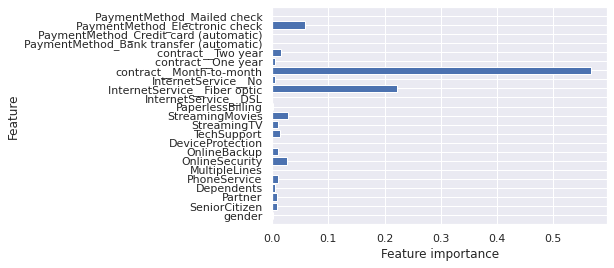

In [70]:
# Gera uma árvore com as melhores combinações de hiperparâmetros
tree_3 = DecisionTreeClassifier(random_state=seed, max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Fita o modelo com o dataset de treino
tree_3.fit(X_train, y_train)

# Usa o modelo para prever o conjunto de validação
y_pred = tree_3.predict(X_val)

# Calcular e printar métricas
print("Acurácia no conjunto de treino: {:.3f}".format(tree_3.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(tree_3.score(X_val, y_val)))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print("Área sob a curva ROC: {:.3f}".format(roc_auc_score(y_val, y_pred)))

# Plotar importância das features
# Avalia quão importante é cada variável para as decisões que a árvore fornece
# Corresponde a um número entre 0 e 1 para cada feature, onde 0 significa não usada e 1
# "perfeitamente prevê a resposta". A importância das features sempre somam 1
def plot_feature_importances_customer(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Plotar importância das variáveis
plot_feature_importances_customer(tree_3)

## 4.3 Regressão Logística

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Generate a range with different values for C parameter
grid = {"C": np.arange(1,150,5)}
logreg_cv = GridSearchCV(LogisticRegression(solver='liblinear'), grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("Melhores hiperparâmetros: ", logreg_cv.best_params_)
print("Acurácia:", logreg_cv.best_score_)

Melhores hiperparâmetros:  {'C': 1}
Acurácia: 0.7863062370960772


## 4.4 XGB

In [72]:
import sys
!{sys.executable} -m pip install xgboost


 Melhores hiperparâmetros:
{'alpha': 5, 'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 4}
Acurácia média no conjunto de validação: 0.826 +/- 0.011


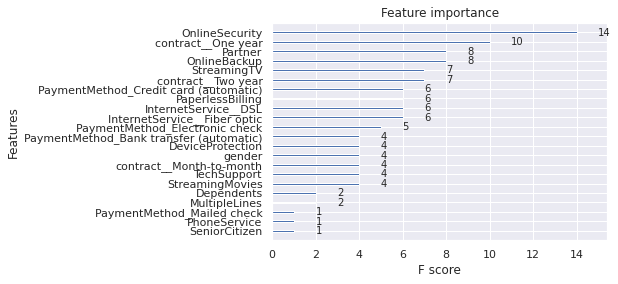

In [73]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Define um conjunto de possíveis valores para os hiperparâmetros
params = {'learning_rate': [0.1, 0.2, 0.3],
          'alpha': [5, 10, 15],
          'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 1.0],
          'max_depth': [3, 4, 5]}

# Cria o modelo
xgb_model_cv_gs = xgb.XGBClassifier(objective="binary:logistic", random_state=seed,
                                    eval_metric="auc", n_estimators=10,use_label_encoder=False)

# Cria o grid search com validação cruzada estratificada
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
grid_search = GridSearchCV(xgb_model_cv_gs, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_training, y_training))

# Treina o modelo e printa os melhores hiperparâmetros
grid_search.fit(X_training, y_training)
print('\n Melhores hiperparâmetros:')
print(grid_search.best_params_)

# Obtém os resultados da validação cruzada
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Acurácia média no conjunto de validação: {:.3f} +/- {:.3f}".format(
  cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
  cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])
)

# Atribui os melhores valores para os hiperparâmetros
xgb_model_cv_gs.set_params(learning_rate = grid_search.best_params_['learning_rate'],
                           alpha = grid_search.best_params_['alpha'],
                           colsample_bytree = grid_search.best_params_['colsample_bytree'],
                           max_depth = grid_search.best_params_['max_depth'])

# Treina o modelo usando os melhores hiperparâmetros
xgb_model_cv_gs.fit(X_training, y_training)

# Plota a importância das variáveis
xgb.plot_importance(xgb_model_cv_gs)
plt.show()

# 5 - Grupo


Aqui temos o histórico de cada cliente, uma adaptação do charge_records.csv

In [77]:
df_merge = pd.read_csv('Datasets/charge_records_room2.csv', sep=';')
df_merge

,customerID,M-0,M-1,M-10,M-11,M-12,M-13,M-14,M-15,M-16,M-17,M-18,M-19,M-2,M-20,M-21,M-22,M-23,M-24,M-25,M-26,M-27,M-28,M-29,M-3,M-30,M-31,M-32,M-33,M-34,M-35,M-36,M-37,M-38,M-39,M-4,M-40,M-41,M-42,M-43,M-44,M-45,M-46,M-47,M-48,M-49,M-5,M-50,M-51,M-52,M-53,M-54,M-55,M-56,M-57,M-58,M-59,M-6,M-60,M-61,M-62,M-63,M-64,M-65,M-66,M-67,M-68,M-69,M-7,M-70,M-71,M-8,M-9
0,0002-ORFBO,"65,745","65,658",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"66,586",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"65,629",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"66,267",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"65,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"65,919",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"65,687",NaN,NaN,"66,209",NaN
1,0003-MKNFE,"61,022","60,098",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"60,461",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"59,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"59,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"60,362",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"60,131",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"60,164",NaN,NaN,"60,263",NaN
2,0004-TLHLJ,"66,3775","71,245",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"73,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"69,3275",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-IGKFF,"96,554","97,6385","95,4695","92,5775","97,277",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"94,0235",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95,831",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"97,6385",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"90,047",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"94,7465",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95,4695",NaN,NaN,"94,0235","96,554"
4,0013-EXCHZ,"92,221","84,214",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"90,965",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,"55,9285","57,226","56,707","56,188","55,9285",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"56,188",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"56,188",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"63,973",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"57,4855",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"57,226",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"57,226",NaN,NaN,"57,226","55,4095"
7028,9992-RRAMN,"85,25","85,145","85,115","85,115","85,1","85,1","85,145","85,205","85,175","85,16","85,19","85,145","85,13","85,1","85,415",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"85,28",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"85,115",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"85,13",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"85,16",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"85,145",NaN,NaN,"85,13","85,25"
7029,9992-UJOEL,"49,7505","42,9995",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7030,9993-LHIEB,"67,85","68,667","67,85","67,85","67,85","69,484","67,85","68,667","67,85","68,667","69,484","67,85","67,85","71,935","68,667","69,484","68,667","69,484","68,667","67,85","71,118","67,85","73,569","67,85","71,935","67,85","71,935","69,484","67,85","69,484","71,118","71,935","68,667","68,667","67,85","67,85","67,85","67,85","68,667","71,935","67,85","71,118","70,301","68,667","67,85","69,484","67,85","67,85","67,85","69,484","67,85","67,85","67,85","68,667","67,85","68,667","69,484","70,301","68,667","76,02","68,667","68,667","67,85",

In [79]:
df = df_merge.merge(df_customers3, how='inner', on='customerID')
df

,customerID,M-0,M-1,M-10,M-11,M-12,M-13,M-14,M-15,M-16,M-17,M-18,M-19,M-2,M-20,M-21,M-22,M-23,M-24,M-25,M-26,M-27,M-28,M-29,M-3,M-30,M-31,M-32,M-33,M-34,M-35,M-36,M-37,M-38,M-39,M-4,M-40,M-41,M-42,M-43,...,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InternetService__DSL,InternetService__Fiber optic,InternetService__No,contract__Month-to-month,contract__One year,contract__Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnReason_Attitude of service provider,ChurnReason_Attitude of support person,ChurnReason_Competitor had better devices,ChurnReason_Competitor made better offer,ChurnReason_Competitor offered higher download speeds,ChurnReason_Competitor offered more data,ChurnReason_Deceased,ChurnReason_Don't know,ChurnReason_Extra data charges,ChurnReason_Lack of affordable download/upload speed,ChurnReason_Lack of self-service on Website,ChurnReason_Limited range of services,ChurnReason_Long distance charges,ChurnReason_Moved,ChurnReason_Network reliability,ChurnReason_Poor expertise of online support,ChurnReason_Poor expertise of phone support,ChurnReason_Price too high,ChurnReason_Product dissatisfaction,ChurnReason_Service dissatisfaction
0,0002-ORFBO,"65,745","65,658",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"66,586",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"65,629",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"66,267",NaN,NaN,NaN,NaN,...,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0003-MKNFE,"61,022","60,098",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"60,461",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"59,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"59,9",NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0004-TLHLJ,"66,3775","71,245",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"73,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"69,3275",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0011-IGKFF,"96,554","97,6385","95,4695","92,5775","97,277",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"94,0235",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95,831",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"97,6385",NaN,NaN,NaN,NaN,...,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0013-EXCHZ,"92,221","84,214",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"90,965",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,"55,9285","57,226","56,707","56,188","55,9285",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"56,188",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"56,188",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"63,973",NaN,NaN,NaN,NaN,...,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7028,9992-RRAMN,"85,25","85,145","85,115","85,115","85,1","85,1","85,145","85,205","85,175","85,16","85,19","85,145","85,13","85,1","85,415",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"85,28",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"85,115",NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7029,9992-UJOEL,"49,7505","42,9995",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7030,9993-LHIEB,"67,85","68,667",

In [102]:
tempo = df_merge.groupby('customerID').count().sum(axis=1)
tempo

customerID
0002-ORFBO     9
0003-MKNFE     9
0004-TLHLJ     4
0011-IGKFF    13
0013-EXCHZ     3
              ..
9987-LUTYD    13
9992-RRAMN    22
9992-UJOEL     2
9993-LHIEB    67
9995-HOTOH    63
Length: 7032, dtype: int64

In [123]:
df_customers3['tempo'] = tempo
df_customers3

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InternetService__DSL,InternetService__Fiber optic,InternetService__No,contract__Month-to-month,contract__One year,contract__Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnReason_Attitude of service provider,ChurnReason_Attitude of support person,ChurnReason_Competitor had better devices,ChurnReason_Competitor made better offer,ChurnReason_Competitor offered higher download speeds,ChurnReason_Competitor offered more data,ChurnReason_Deceased,ChurnReason_Don't know,ChurnReason_Extra data charges,ChurnReason_Lack of affordable download/upload speed,ChurnReason_Lack of self-service on Website,ChurnReason_Limited range of services,ChurnReason_Long distance charges,ChurnReason_Moved,ChurnReason_Network reliability,ChurnReason_Poor expertise of online support,ChurnReason_Poor expertise of phone support,ChurnReason_Price too high,ChurnReason_Product dissatisfaction,ChurnReason_Service dissatisfaction,tempo
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
0003-MKNFE,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
0004-TLHLJ,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.0
0011-IGKFF,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.0
0013-EXCHZ,0,1,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0
9992-RRAMN,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,22.0
9992-UJOEL,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0


In [126]:
pip install XlsxWriter

     |████████████████████████████████| 153kB 4.3MB/s 


In [130]:
excel = pd.ExcelWriter('dados_group2.xlsx', engine='xlsxwriter')
df_customers3.to_excel(excel, sheet_name='dados')
excel.save()